In [1]:
import pandas as pd
import numpy as np
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 6]
%matplotlib inline

SELECT Value FROM HisPeak10Seconds WHERE DefTable = 'HisItemCurr' AND DefColumn = 'Item005' and DataSavedTime     BETWEEN '2019-10-09 11:00:00' and '2019-10-10 11:00:00' ORDER BY DataSavedTime DESC
SELECT Value FROM HisPeak WHERE DefTable = 'HisItemCurr' AND DefColumn = 'Item005' and DataSavedTime     BETWEEN '2019-10-10 11:00:00' and '2019-10-10 12:00:00' ORDER BY DataSavedTime DESC


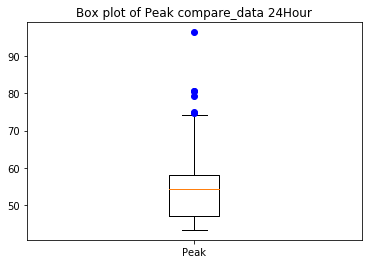

compare_data Median 54.41
MAX:  96.32
Q2 quantile of compare_data :  54.41
Q1 quantile of compare_data :  47.09
Q3 quantile of compare_data :  57.995000000000005
100th quantile of compare_data :  45.34400000000001
MIN:  43.38


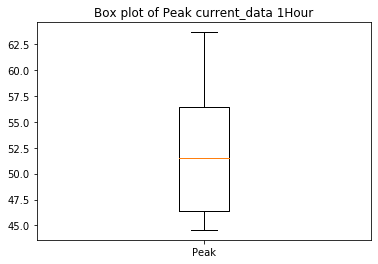

current_data Median 51.55
MAX:  63.67
Q2 quantile of current_data :  51.55
Q1 quantile of current_data :  46.38
Q3 quantile of current_data :  56.44
100th quantile of current_data :  45.328
MIN:  44.56
A: median of compare_data
B: median of current_data
C = A-B = 2.8599999999999994
D = C/B= 0.05548011639185256
5.55%
유의수준 0.1 하에서 지난 24시간의 Peak의 중위값과 지난 1시간 Peak의 중위값이 동일하다고 할 수 있다.


In [6]:
conn = pymysql.connect(
    host='192.168.100.50',
    port=16033,
    user='root',
    password='its@1234',
    db='UYeG_Cloud',
    charset='utf8'
)

curs = conn.cursor()

set_day1 = '2019-10-09 11:00:00'
set_day2 = '2019-10-10 11:00:00'
set_day3 = '2019-10-10 11:00:00'
set_day4 = '2019-10-10 12:00:00'

# LAST 24HOURS : 2019-10-09 10:00:00 ~ 2019-10-10 10:00:00 : 10초 데이터 가져오기
sql = "SELECT Value FROM HisPeak10Seconds WHERE DefTable = 'HisItemCurr' AND DefColumn = 'Item005' and DataSavedTime \
    BETWEEN '"+set_day1+"' and '"+set_day2+"' ORDER BY DataSavedTime DESC"
print(sql)
curs.execute(sql)

rows=curs.fetchall()

# LAST 1HOUR : 2019-10-10 10:00:00 ~ 2019-10-10 11:00:00 : 1초 데이터 가져오기
sql2 = "SELECT Value FROM HisPeak WHERE DefTable = 'HisItemCurr' AND DefColumn = 'Item005' and DataSavedTime \
    BETWEEN '"+set_day3+"' and '"+set_day4+"' ORDER BY DataSavedTime DESC"
print(sql2)
curs.execute(sql2)
rows2=curs.fetchall()
conn.close()

compare_data = list(rows)
current_data = list(rows2)

# 람다식으로 list 만들기 comprehension
# [row for row in map(lambda x: x[0], li) if row != None]
compare_data = list(filter(lambda x: x != None, map(lambda x: x[0], compare_data)))
current_data = list(filter(lambda x: x != None, map(lambda x: x[0], current_data)))


# Basic box plot
plt.boxplot(compare_data, sym="bo")
plt.title('Box plot of Peak compare_data 24Hour')
plt.xticks([1], ['Peak'])
plt.show()

print('compare_data Median', np.median(compare_data))
print("MAX: ", np.max(compare_data))
print("Q2 quantile of compare_data : ", np.quantile(compare_data, .50)) 
print("Q1 quantile of compare_data : ", np.quantile(compare_data, .25)) 
print("Q3 quantile of compare_data : ", np.quantile(compare_data, .75)) 
print("100th quantile of compare_data : ", np.quantile(compare_data, .1))  
print("MIN: ", np.min(compare_data))

plt.boxplot(current_data, sym="bo")
plt.title('Box plot of Peak current_data 1Hour')
plt.xticks([1], ['Peak'])
plt.show()

print('current_data Median', np.median(current_data))
print("MAX: ", np.max(current_data))
print("Q2 quantile of current_data : ", np.quantile(current_data, .50)) 
print("Q1 quantile of current_data : ", np.quantile(current_data, .25)) 
print("Q3 quantile of current_data : ", np.quantile(current_data, .75)) 
print("100th quantile of current_data : ", np.quantile(current_data, .1))  
print("MIN: ", np.min(current_data))

a = np.median(compare_data)
b = np.median(current_data)
c = np.median(compare_data) - np.median(current_data)
d = c/b
print("A: median of compare_data")
print("B: median of current_data")

print("C = A-B =", c)
print('D = C/B=', d)
print(str(format(d*100, ".2f")) + '%')
if d < 0.01:
    print("유의수준 0.01 하에서 지난 24시간의 Peak의 중위값과 지난 1시간 Peak의 중위값이 동일하다고 할 수 있다.")
elif d < 0.05:
    print("유의수준 0.05 하에서 지난 24시간의 Peak의 중위값과 지난 1시간 Peak의 중위값이 동일하다고 할 수 있다.")
elif d < 0.1:
    print("유의수준 0.1 하에서 지난 24시간의 Peak의 중위값과 지난 1시간 Peak의 중위값이 동일하다고 할 수 있다.")
else:
    print("bad")